In [26]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy import stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [27]:
OViN = pd.read_excel('OViN2017_Databestand.xlsx', sheet_name = 'Databestand')

# Preparation

In [28]:
OViN['Trip_distance'] = OViN['AfstR'] + OViN['AfstRBL']

In [29]:
car_trips = OViN
car_trips = car_trips[['Rvm', 'Brandstof', 'XBrandstof', 'Trip_distance']]

In [30]:
car_trips = car_trips[car_trips['Rvm'] == 6]
car_trips = car_trips.reset_index(drop = True)

In [ ]:
car_trips['fuel'] = 0
for i in range(car_trips.shape[0]):
    if car_trips.loc[i, 'Brandstof'] != 11:
        car_trips.loc[i, 'fuel']  = 1
    elif car_trips.loc[i, 'XBrandstof'] != 0:
        car_trips.loc[i, 'fuel'] = 1
    else: car_trips.loc[i, 'fuel'] = 0

In [31]:
conventional_trips = car_trips[car_trips['Brandstof'] != 11]
conventional_trips = conventional_trips.reset_index(drop = True)

EV_trips = car_trips[car_trips['Brandstof'] == 11]
EV_trips = EV_trips.reset_index(drop = True)

full_EV_trips = EV_trips[EV_trips['XBrandstof'] == 0]
full_EV_trips = full_EV_trips.reset_index(drop = True)

hybrid_trips = EV_trips[EV_trips['XBrandstof'] != 0]
hybrid_trips = hybrid_trips.reset_index(drop = True)

In [39]:
conventional_trips.to_csv('conventional_trips.csv')
EV_trips.to_csv('EV_trips.csv')
full_EV_trips.to_csv('full_EV_trips.csv')
hybrid_trips.to_csv('hybrid_trips.csv')
car_trips.to_csv('car_trips.csv')

In [7]:
number_of_car_trips = car_trips.shape[0]
average_car_trip = car_trips.Trip_distance.mean()
stdev_car_trip = car_trips.Trip_distance.std()

number_of_conventional_trips = conventional_trips.shape[0]
average_conventional_trip = conventional_trips.Trip_distance.mean()
stdev_conventional_trip = conventional_trips.Trip_distance.std()

number_of_EV_trips = EV_trips.shape[0]
average_EV_trip = EV_trips.Trip_distance.mean()
stdev_EV_trip = EV_trips.Trip_distance.std()

number_of_full_EV_trips = full_EV_trips.shape[0]
average_full_EV_trip = full_EV_trips.Trip_distance.mean()
stdev_full_EV_trip = full_EV_trips.Trip_distance.std()

number_of_hybrid_trips = hybrid_trips.shape[0]
average_hybrid_trip = hybrid_trips.Trip_distance.mean()
stdev_hybrid_trip = hybrid_trips.Trip_distance.std()

# Normality test

In [8]:
stats.shapiro(full_EV_trips['Trip_distance'].to_numpy())

(0.7448009848594666, 5.637552599226103e-13)

In [9]:
stats.shapiro(conventional_trips['Trip_distance'].to_numpy())

C:\Users\104105\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.4091988205909729, 0.0)

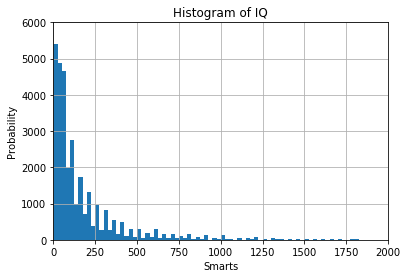

In [24]:
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
bins = range(0, 2000, 25)
plt.hist(conventional_trips['Trip_distance'], bins=bins)
plt.xlim(0, 2000)
plt.ylim(0, 6000)
plt.grid(True)
plt.show()

# ANOVA

# T-test

In [11]:
conventional_trip_list = list(conventional_trips['Trip_distance'])
EV_trips_list = list(full_EV_trips['Trip_distance'])

In [12]:
ttest=stats.ttest_ind(conventional_trip_list,EV_trips_list)
ttest

Ttest_indResult(statistic=-1.047604097186123, pvalue=0.2948290108668631)

In [42]:
full_EV_trips

,Rvm,Brandstof,XBrandstof,Trip_distance
0,6.0,11,0,40.0
1,6.0,11,0,40.0
2,6.0,11,0,8.0
3,6.0,11,0,20.0
4,6.0,11,0,30.0
5,6.0,11,0,110.0
6,6.0,11,0,100.0
7,6.0,11,0,10.0
8,6.0,11,0,8.0
9,6.0,11,0,861.0
